In [1]:
import pandas as pd
import numpy as np

# Importing the original dataset in SAS format
path = 'C:/Users/Kenneth/Desktop/18040394_KennethLauKhengSoong_Aug21/System Files/Original Data Files/ed2017_sas.sas7bdat'

# Selecting only required variables from the original dataset
df = pd.read_sas(path)
df1 = df[['WAITTIME','AGER','SEX','ARREMS','AMBTRANSFER','IMMEDR','PAINSCALE','HOSPCODE','PATCODE']]

# Writing out the dataset with only the chosen variables
df1.to_csv('C:/Users/Kenneth/Desktop/18040394_KennethLauKhengSoong_Aug21/System Files/Original Data Files/ED2017.csv', index=False)

In [2]:
# Reading the dataset with only chosen variables
ed17 = pd.read_csv('C:/Users/Kenneth/Desktop/18040394_KennethLauKhengSoong_Aug21/System Files/Original Data Files/ED2017.csv')

# Data cleaning
ed17['WAITTIME'] = ed17['WAITTIME'].replace([-9], np.NaN)
ed17['SEX'] = ed17['SEX'].replace([1], 0)
ed17['SEX'] = ed17['SEX'].replace([2], 1)
ed17['ARREMS'] = ed17['ARREMS'].replace([-8], np.NaN)
ed17['ARREMS'] = ed17['ARREMS'].replace([-9], np.NaN)
ed17['ARREMS'] = ed17['ARREMS'].replace([2], 0)
ed17['AMBTRANSFER'] = ed17['AMBTRANSFER'].replace([-8], np.NaN)
ed17['AMBTRANSFER'] = ed17['AMBTRANSFER'].replace([-9], np.NaN)
ed17['AMBTRANSFER'] = ed17['AMBTRANSFER'].replace([-7], 3)
ed17['IMMEDR'] = ed17['IMMEDR'].replace([0], 6)
ed17['IMMEDR'] = ed17['IMMEDR'].replace([-8], np.NaN)
ed17['IMMEDR'] = ed17['IMMEDR'].replace([-9], np.NaN)
ed17['PAINSCALE'] = ed17['PAINSCALE'].replace([-8], np.NaN)
ed17['PAINSCALE'] = ed17['PAINSCALE'].replace([-9], np.NaN)

In [3]:
# Printing the descriptive analysis
print("\nDescriptive Analysis of ED2017 Before Data Pre-processing\n")
descanalysis = ed17.describe(include = 'all')
print(descanalysis)

# Printing all variables with their number of missing values
print("\nNumber of Missing Values Found for Each Variable\n")
summiss = ed17.isnull().sum()
print(summiss)


Descriptive Analysis of ED2017 Before Data Pre-processing

           WAITTIME          AGER           SEX        ARREMS   AMBTRANSFER  \
count  14786.000000  16709.000000  16709.000000  16197.000000  16231.000000   
mean      34.839984      3.082471      0.452391      0.157313      2.856694   
std       64.308342      1.480347      0.497743      0.364107      0.371561   
min       -7.000000      1.000000      0.000000      0.000000      1.000000   
25%        6.000000      2.000000      0.000000      0.000000      3.000000   
50%       15.000000      3.000000      0.000000      0.000000      3.000000   
75%       37.000000      4.000000      1.000000      0.000000      3.000000   
max     1440.000000      6.000000      1.000000      1.000000      3.000000   

             IMMEDR     PAINSCALE      HOSPCODE       PATCODE  
count  13134.000000  10912.000000  16709.000000  16709.000000  
mean       3.538526      4.775568    103.876773     50.154049  
std        1.179342      3.644617   

In [4]:
from sklearn.impute import KNNImputer # Importing the K-Nearest Neighbor Package

imputer = KNNImputer() # Defining the Imputer

imputed_waittime = imputer.fit_transform(ed17) # Fitting the Imputer and Transforming it onto the Dataset
ed17_temp = pd.DataFrame(imputed_waittime) # Creating a temporary dataframe to store the imputed values
ed17_temp.columns = ed17.columns # Copying the columns from the main dataframe to the temporary dataframe

# Replacing the imputed values for variables with missing values from the temporary dataframe to the existing dataframe
ed17['WAITTIME'] = ed17_temp['WAITTIME']

In [5]:
# Imputing the categorical variable 'ARREMS' using mode imputation
for column in ['ARREMS']:
    ed17[column].fillna(ed17[column].mode()[0], inplace = True)
ed17['ARREMS'] = ed17['ARREMS'].replace([3], 2)
    
# Imputing the categorical variable 'AMBTRANSFER' using mode imputation
for column in ['AMBTRANSFER']:
    ed17[column].fillna(ed17[column].mode()[0], inplace = True)

In [6]:
from sklearn.experimental import enable_iterative_imputer # Required to import Iterative Imputer package
from sklearn.impute import IterativeImputer # Importing the iterative imputer package used by MICE

# Defining the imputer
mice_imputer = IterativeImputer()

# Fitting and transforming the imputed values and importing it into a temporary dataframe
ed17filled = mice_imputer.fit_transform(ed17)
ed17filled_temp = pd.DataFrame(ed17filled)

# Matching the temporary dataframe columns with the original dataframe
ed17filled_temp.columns = ed17.columns

# Replacing missing values in the original dataframe with imputed values from the temporary dataframe
ed17['IMMEDR'] = ed17filled_temp['IMMEDR']
ed17['PAINSCALE'] = ed17filled_temp['PAINSCALE']

In [7]:
# Rounding up the imputed results to the nearest integer

ed17['WAITTIME'] = ed17['WAITTIME'].round()
ed17['IMMEDR'] = ed17['IMMEDR'].round()
ed17['PAINSCALE'] = ed17['PAINSCALE'].round()

# Printing temporary dataframe to view the changes
ed17[:20]

,WAITTIME,AGER,SEX,ARREMS,AMBTRANSFER,IMMEDR,PAINSCALE,HOSPCODE,PATCODE
0,72.0,3.0,1.0,0.0,3.0,4.0,5.0,1.0,1.0
1,64.0,1.0,0.0,0.0,3.0,4.0,5.0,1.0,2.0
2,-7.0,4.0,1.0,0.0,3.0,3.0,5.0,1.0,3.0
3,29.0,1.0,1.0,0.0,3.0,4.0,4.0,1.0,4.0
4,20.0,1.0,0.0,0.0,3.0,4.0,5.0,1.0,5.0
5,2.0,4.0,1.0,0.0,3.0,3.0,2.0,1.0,6.0
6,86.0,6.0,0.0,0.0,3.0,2.0,4.0,1.0,7.0
7,3.0,1.0,1.0,0.0,3.0,4.0,4.0,1.0,8.0
8,112.0,3.0,0.0,0.0,3.0,3.0,7.0,1.0,9.0
9,26.0,5.0,0.0,0.0,3.0,2.0,6.0,1.0,10.0


In [8]:
# Printing descriptive analysis of the cleaned dataset
print("\nDescriptive Analysis of ED2017 After Data Imputations\n")
descanalysisclean = ed17['WAITTIME'].describe()
print(descanalysisclean)

# Printing the number of missing values to double check
print("\nNumber of Missing Values Found for Each Variable\n")
newmiss = ed17.isnull().sum()
print(newmiss)

# Writing out the cleaned dataset for descriptive analysis merging
ed17.to_csv('C:/Users/Kenneth/Desktop/18040394_KennethLauKhengSoong_Aug21/System Files/Datasheets/ED17Continuous.csv', index=False)


Descriptive Analysis of ED2017 After Data Imputations

count    16709.000000
mean        34.709917
std         61.454279
min         -7.000000
25%          7.000000
50%         16.000000
75%         39.000000
max       1440.000000
Name: WAITTIME, dtype: float64

Number of Missing Values Found for Each Variable

WAITTIME       0
AGER           0
SEX            0
ARREMS         0
AMBTRANSFER    0
IMMEDR         0
PAINSCALE      0
HOSPCODE       0
PATCODE        0
dtype: int64


In [9]:
# Transforming the values in the variable wait time to a categorical value
ed17.loc[(ed17['WAITTIME'] >= 0) & (ed17['WAITTIME'] <= 10), 'WAITTIME'] = 1
ed17.loc[(ed17['WAITTIME'] > 10) & (ed17['WAITTIME'] <= 60), 'WAITTIME'] = 2
ed17.loc[(ed17['WAITTIME'] > 60), 'WAITTIME'] = 3
ed17.loc[(ed17['WAITTIME'] < 0), 'WAITTIME'] = 0

In [10]:
# Writing the clean dataset into a .csv file
ed17.to_csv('C:/Users/Kenneth/Desktop/18040394_KennethLauKhengSoong_Aug21/System Files/Datasheets/ED17.csv', index=False)

2.0    8088
1.0    5679
3.0    2529
0.0     413
Name: WAITTIME, dtype: int64


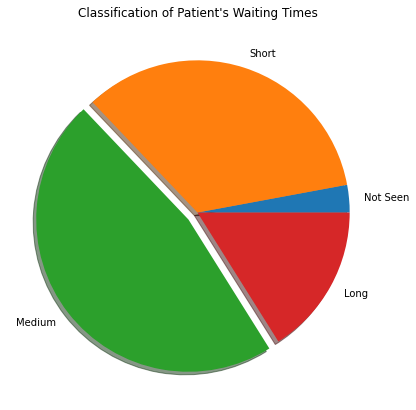

In [11]:
import matplotlib.pyplot as plt

# Finding the values of waiting time
wtt = ed17['WAITTIME'].value_counts()
print(wtt)

# Plotting a pie chart for waiting time classification
waittimelabel = ['Not Seen', 'Short', 'Medium', 'Long']
waittimedata = [593, 6935, 9500, 3263]
explode = (0.0, 0.0, 0.075, 0.0)

fig = plt.figure(figsize = (10, 7))
plt.pie(waittimedata,
        labels = waittimelabel,
        explode = explode,
        shadow = True)

plt.title("Classification of Patient's Waiting Times")
plt.show()

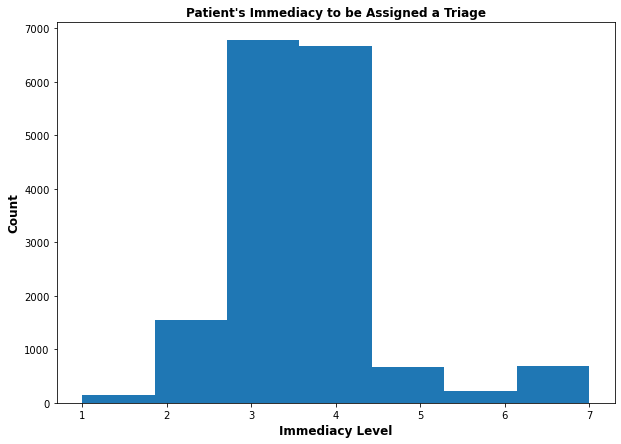

In [12]:
# Plotting a histogram for patient's immediacy to be assigned a triage
immedrax = ed17.hist(column='IMMEDR',
                     bins = 7,
                     grid = False,
                     figsize = (10, 7))

immedrax = immedrax[0]
for x in immedrax:
    x.set_title("Patient's Immediacy to be Assigned a Triage",
                weight = 'bold',
                size = 12)
    x.set_xlabel("Immediacy Level",
                 weight = 'bold',
                 size = 12)
    x.set_ylabel("Count",
                 weight = 'bold',
                 size = 12)

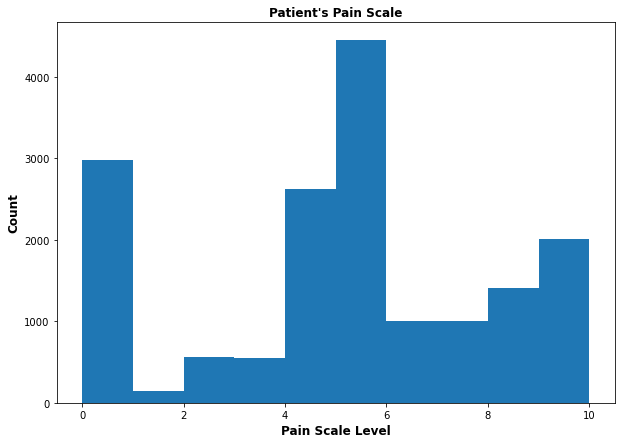

In [13]:
# Plotting a histogram for patient's described pain scale
psax = ed17.hist(column='PAINSCALE',
                     bins = 10,
                     grid = False,
                     figsize = (10, 7))

psax = psax[0]
for x in psax:
    x.set_title("Patient's Pain Scale",
                weight = 'bold',
                size = 12)
    x.set_xlabel("Pain Scale Level",
                 weight = 'bold',
                 size = 12)
    x.set_ylabel("Count",
                 weight = 'bold',
                 size = 12)